In [1]:
import pandas as pd

pca_wine = pd.read_csv('wine.data', header = None)
#红酒数据下载地址：
#https://archive.ics.uci.edu/ml/datasets/Wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = pca_wine.iloc[:, 1:].values, pca_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [2]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat.shape
#协方差矩阵

(13, 13)

In [5]:
_vals, _vecs = np.linalg.eig(cov_mat)
#特征值与特征向量
_vals

array([4.82894083, 2.52920254, 1.40778607, 0.97170248, 0.81772614,
       0.64269609, 0.53904343, 0.09124383, 0.16401706, 0.32677915,
       0.30227988, 0.22672631, 0.24405475])

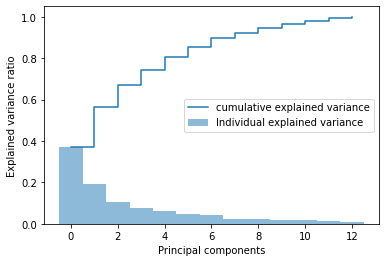

In [10]:
sum_vals = sum(_vals) 
ratio_exp = [(i / sum_vals) for i in sorted(_vals, reverse=True)] 
# 每个特征值所占比例降序排列
cum_ratio_exp = np.cumsum(ratio_exp) 
# 返回比例累积和

import matplotlib.pyplot as plt

plt.bar(range(len(_vals)), ratio_exp, width=1.0, bottom=0.0, alpha=0.5, label='Individual explained variance')
plt.step(range(len(_vals)), cum_ratio_exp, where='post', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [11]:
_pairs =[(np.abs(_vals[i]),_vecs[:,i]) for i in range(len(_vals))] 
# 把特征值和对应的特征向量组成对
_pairs.sort(reverse=True) 
# 用特征值排序

In [14]:
first = _pairs[0][1]
second = _pairs[1][1]
third = _pairs[2][1]
first = first[:,np.newaxis]
second = second[:,np.newaxis]
third = third[:,np.newaxis]
W = np.hstack((first,second,third))

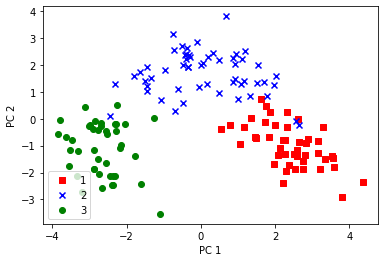

In [16]:
X_train_pca = X_train_std.dot(W) # 转换训练集
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) # 散点图
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()